# Explore Kestrel Segmentations and Features

To install PyAudioAnalysis
```python
pip install pyAudioAnalysis
```

Or developer version

```python
git clone https://github.com/tyiannak/pyAudioAnalysis.git
cd pyAudioAnalysis
pip install -r ./requirements.txt
pip install -e .
cd ..
```

In [1]:
import matplotlib.pyplot as plt
import sound_segmentation

PSeg = sound_segmentation 
from pydub.utils import get_array_type
import array
from pyAudioAnalysis import ShortTermFeatures, MidTermFeatures
from numpy import int16

import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from scipy.io.wavfile import write
import pandas as pd


<ipython-input-2-1483380e6863>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


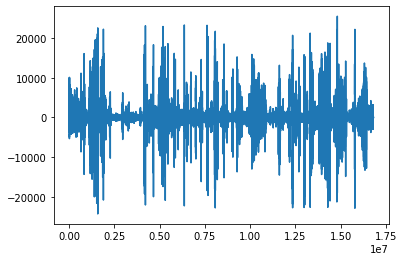

In [2]:
path = os.path.join(os.getcwd(), "../../", "inputs/mp3/mauritius_kestrel.mp3")

(fs,num_a,sound,_) = PSeg.load_data(path)
fig = plt.figure()
plt.plot(num_a)
fig.show()




<ipython-input-3-2f7d1fd48d5f>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


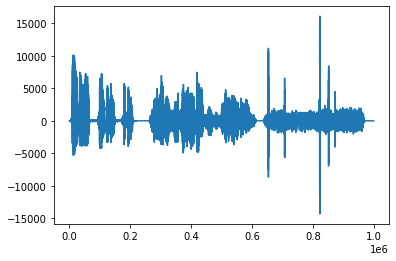

In [3]:
#sound = np.array(sound[0:1000])
#sound = np.transpose(sound)

left = sound.split_to_mono()[0]
bit_depth = left.sample_width * 8

array_type = get_array_type(bit_depth)
num_a = array.array(array_type, left._data)

fig = plt.figure()
plt.plot(num_a[0:1000000])
fig.show()


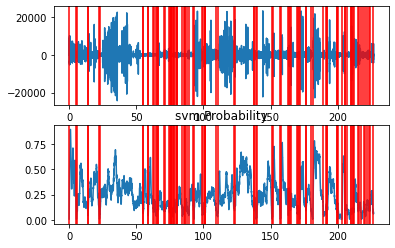

In [4]:
segments = aS.silence_removal(np.array(num_a)[0:10000000], fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.1, plot = True)


##
# Show just a truncated version of the segmentated signal
##

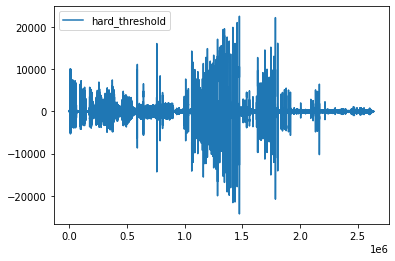

In [5]:

segs_th=[]
for ind,seg in enumerate(segments):
    if ind<6:
        onset = int(seg[0]*fs)
        offset = int(seg[1]*fs)
        wave = num_a[onset:offset]
        segs_th.extend(wave)
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()

/home/user/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


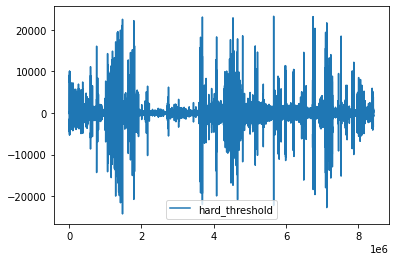

In [6]:

segs_th_trunc=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th_trunc.extend(wave)
fig = plt.figure()
plt.plot(segs_th_trunc,label="hard_threshold")

plt.legend()
plt.show()    




##
# Writing to file means that can use PyAudio's bash API
## 

In [7]:
write("../kestrel_segs_th.wav", fs, int16(segs_th))


In [8]:
!ls ../../outputs/kestrel_segs_th.wav
!du -h ../../outputs/kestrel_segs_th.wav

../../outputs/kestrel_segs_th.wav
5.1M	../../outputs/kestrel_segs_th.wav


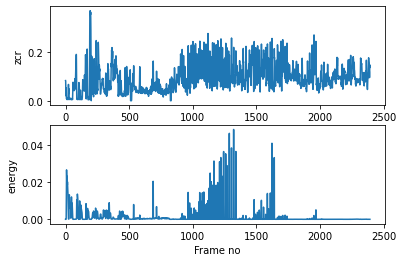

In [9]:
#from pyAudioAnalysis import audioBasicIO
F, f_names = ShortTermFeatures.feature_extraction(segs_th, fs, 0.050*fs, 0.025*fs)
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

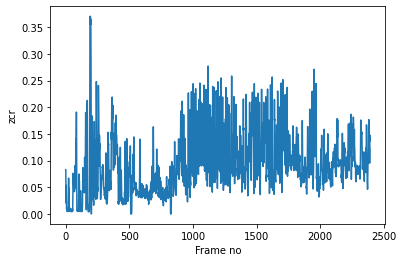

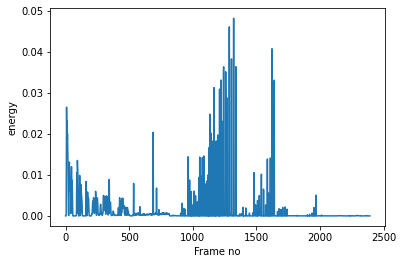

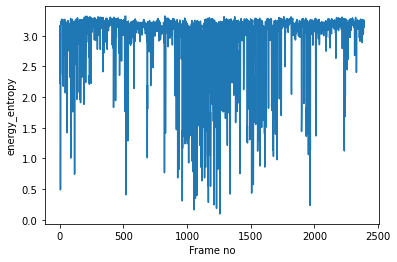

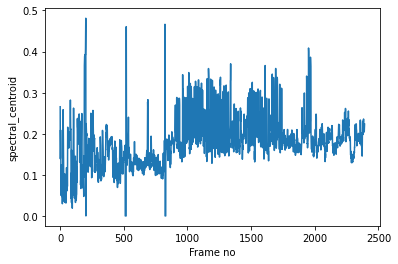

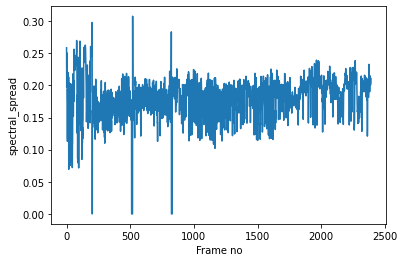

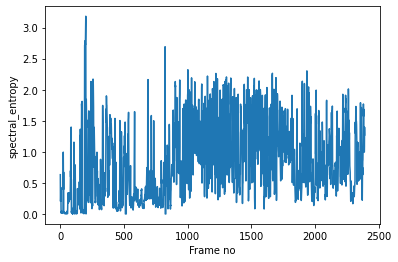

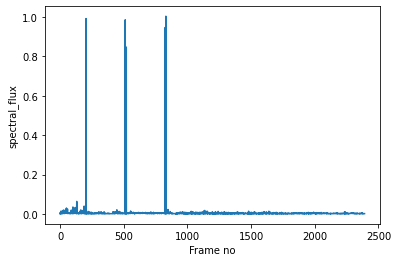

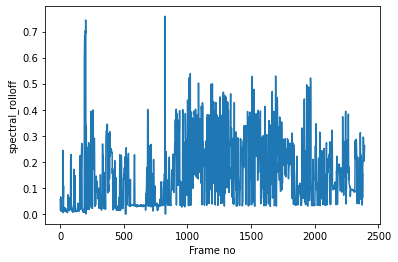

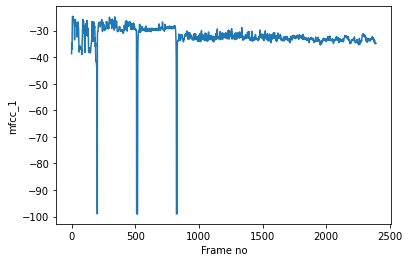

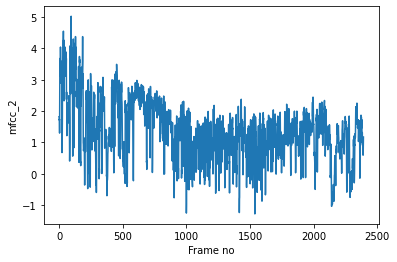

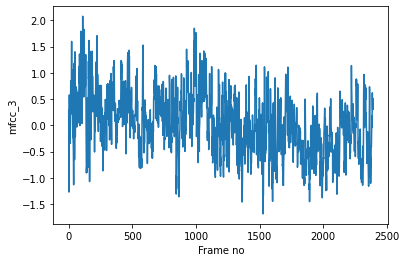

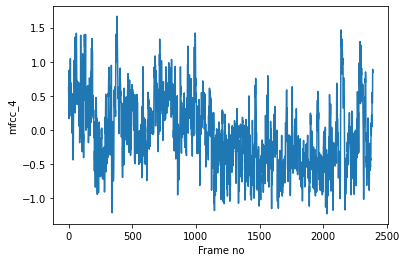

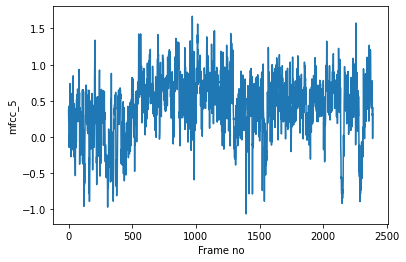

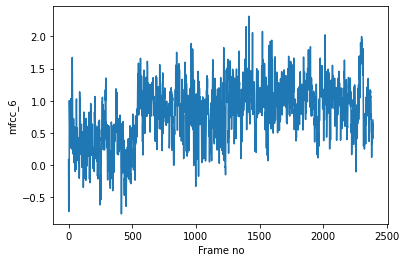

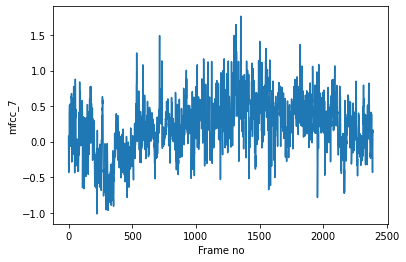

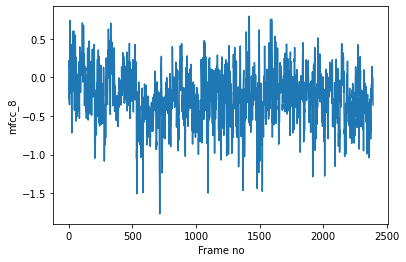

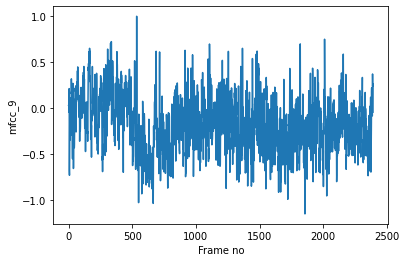

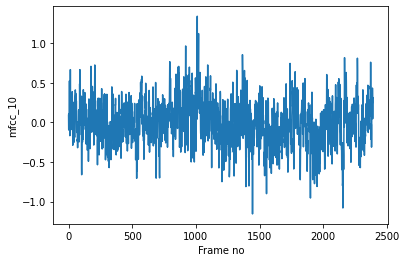

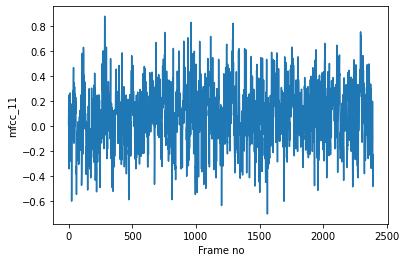

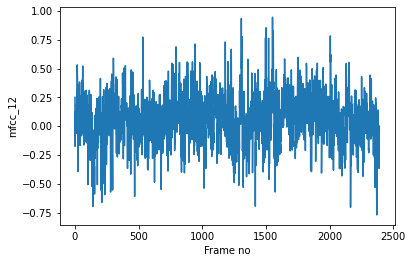

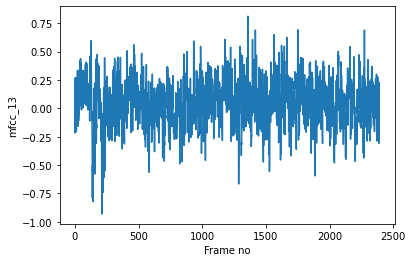

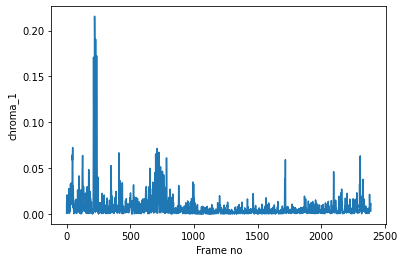

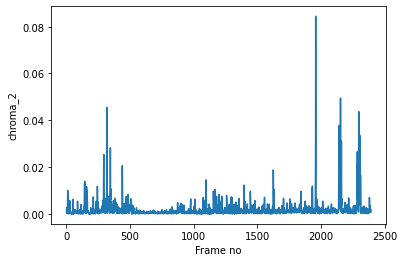

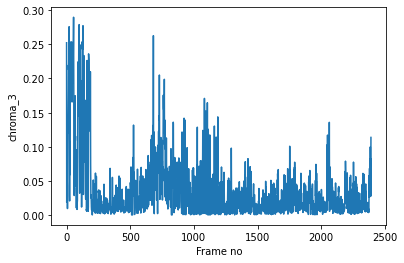

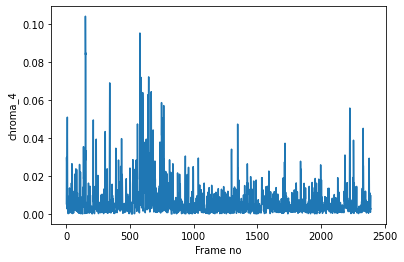

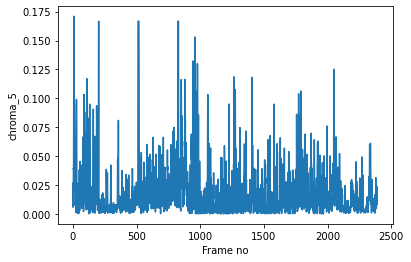

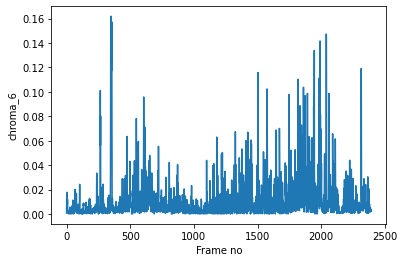

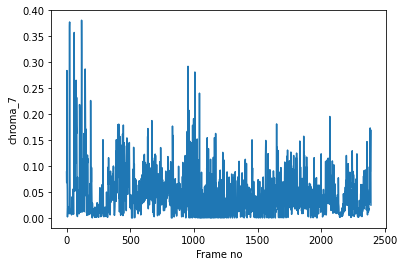

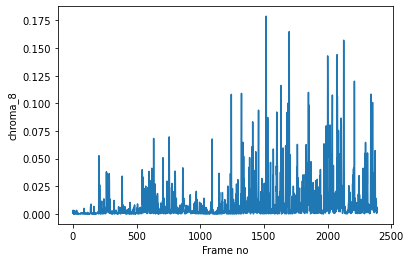

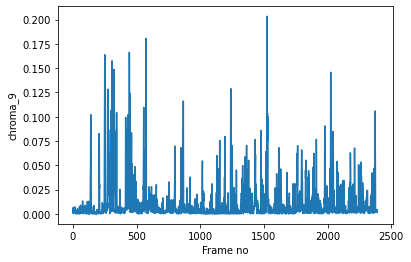

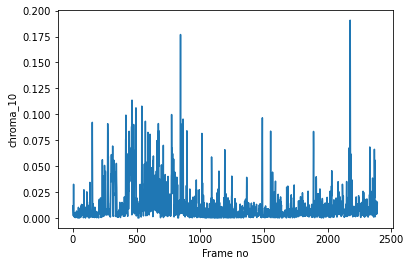

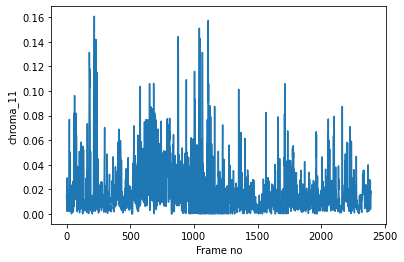

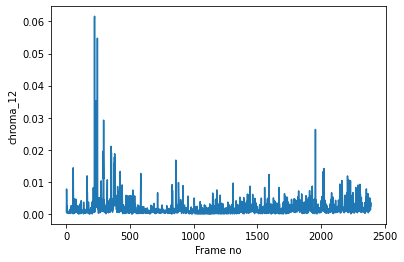

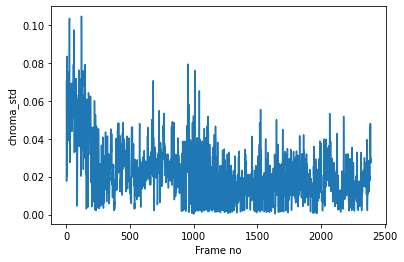

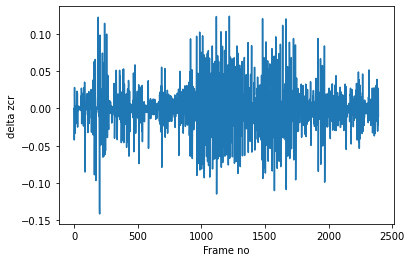

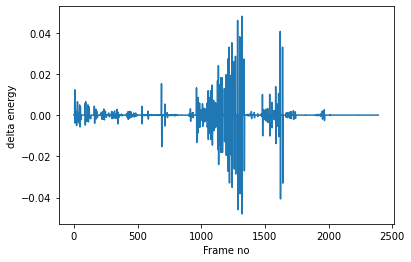

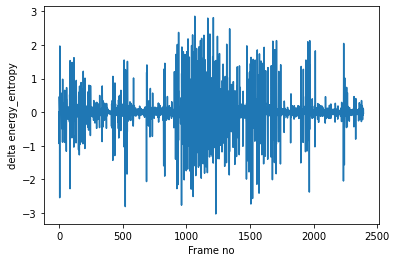

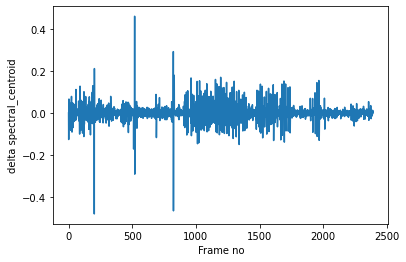

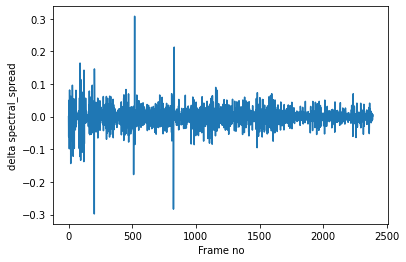

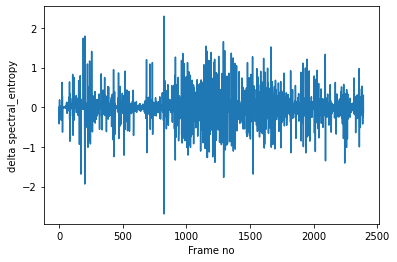

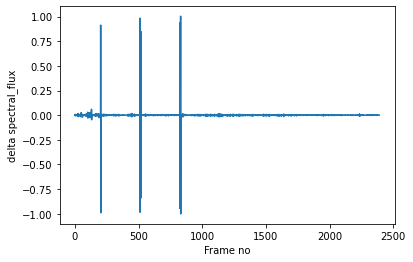

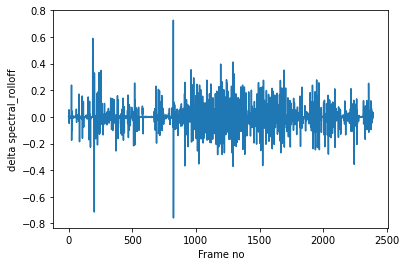

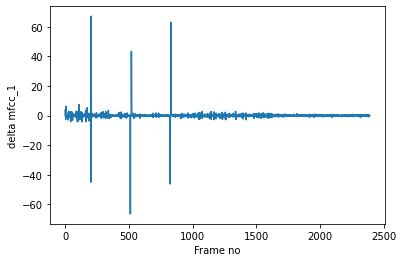

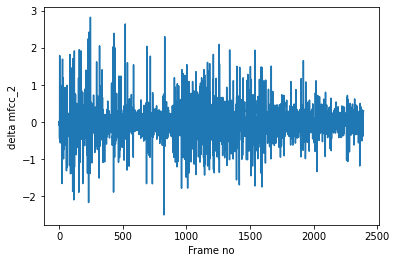

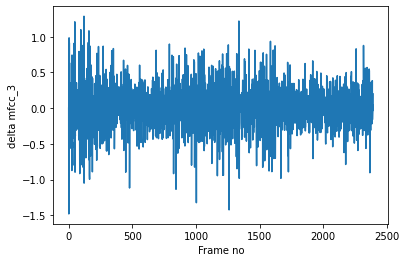

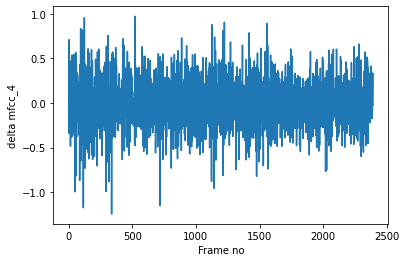

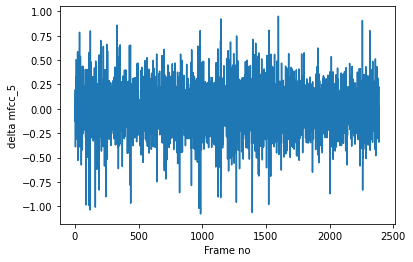

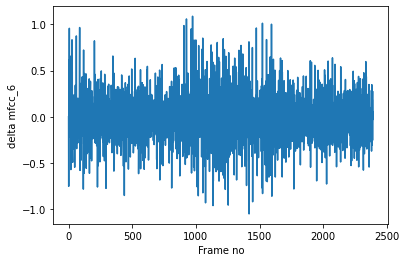

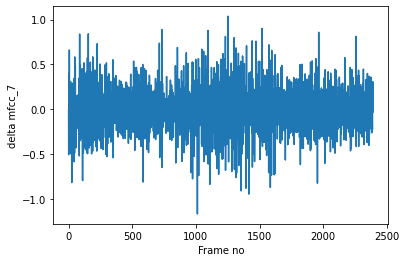

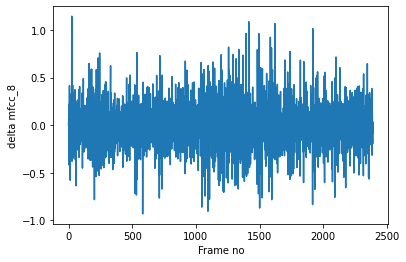

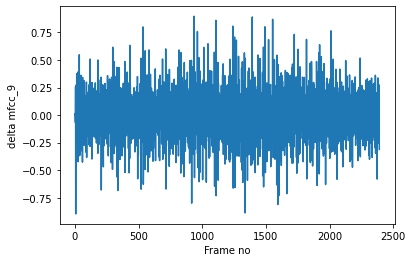

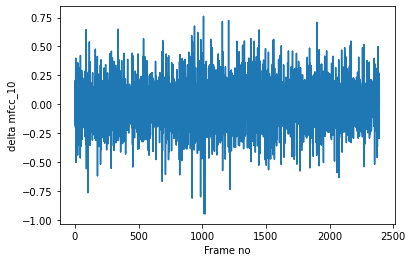

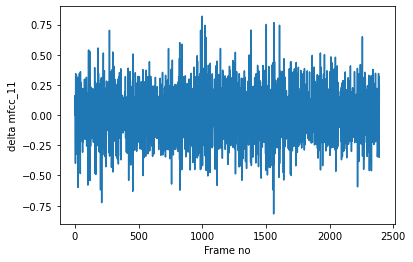

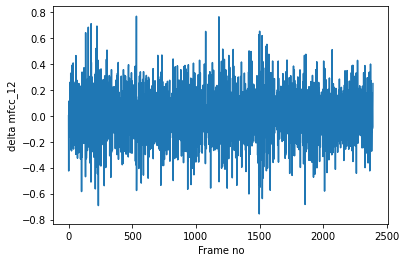

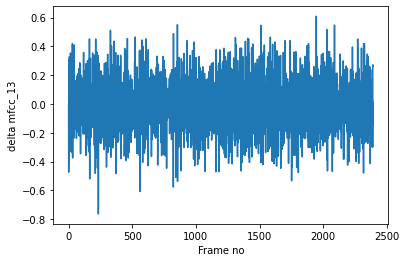

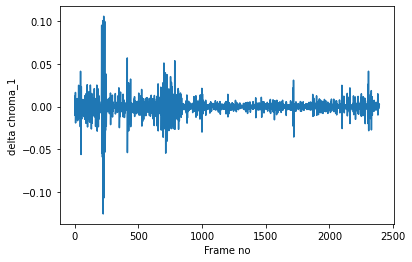

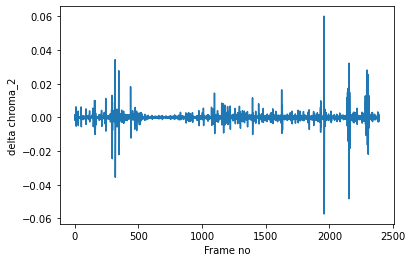

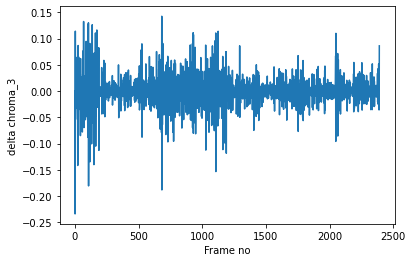

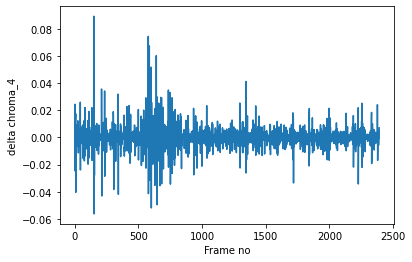

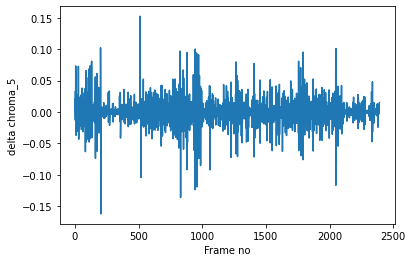

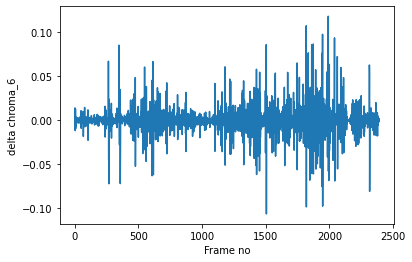

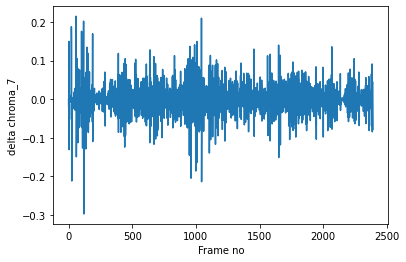

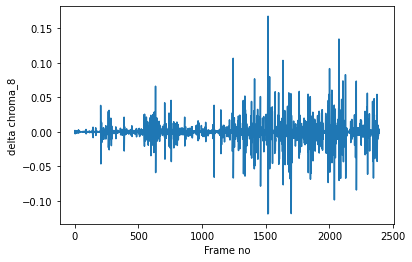

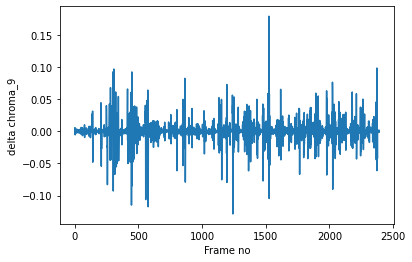

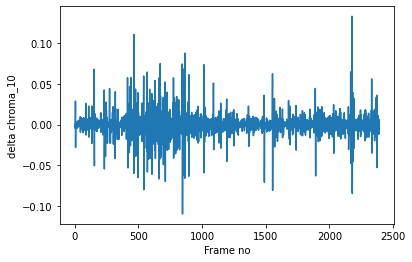

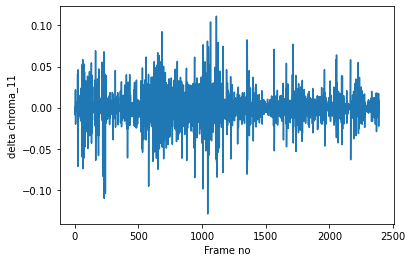

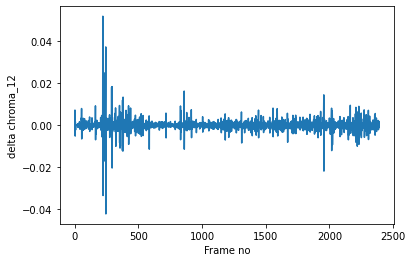

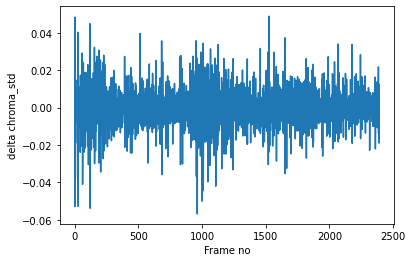

In [10]:
for i,name in enumerate(f_names):
    fig = plt.figure()
    plt.plot(F[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[i]) 
    plt.show()


In [11]:

df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(F, f_names)}])
df=df.T
df

,0
zcr,221.108893
energy,3.157287
energy_entropy,7060.021270
spectral_centroid,428.720264
spectral_spread,429.653729
...,...
delta chroma_9,0.002032
delta chroma_10,0.002561
delta chroma_11,0.001786
delta chroma_12,0.001924


In [12]:
midFeat,shortFeat,midFeatLabels=MidTermFeatures.mid_feature_extraction(
    segs_th, fs,
    0.43*fs, 0.43*fs,
    0.16*fs, 0.16*fs
)

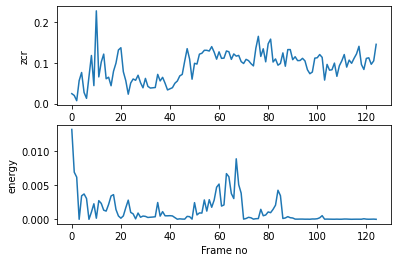

In [13]:
F = midFeat
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

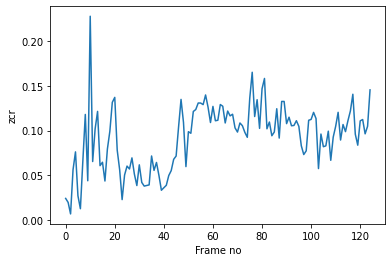

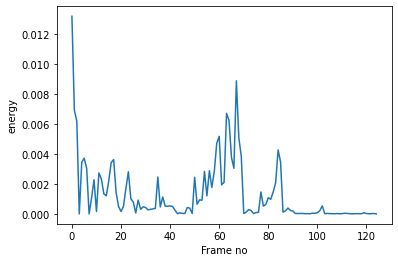

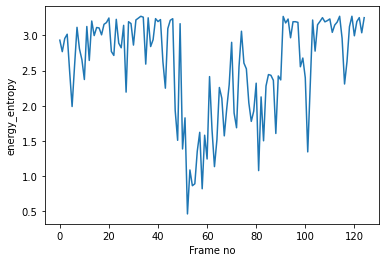

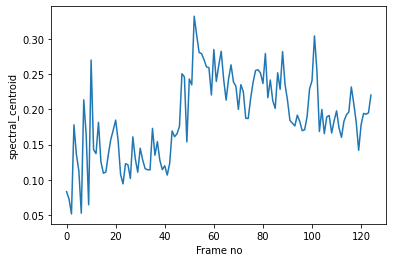

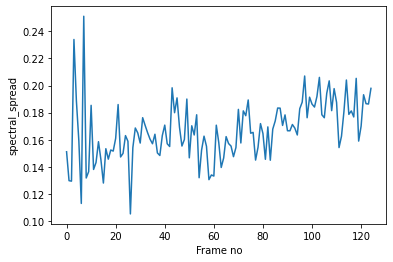

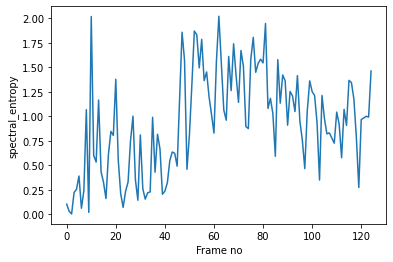

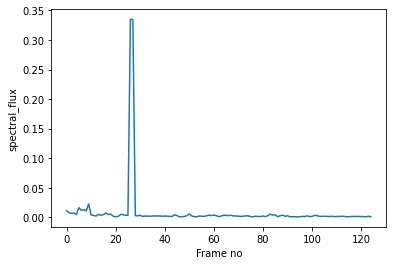

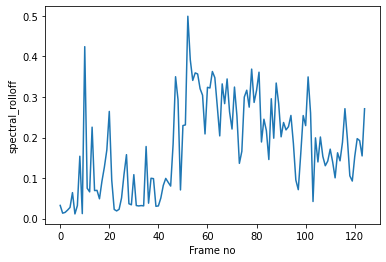

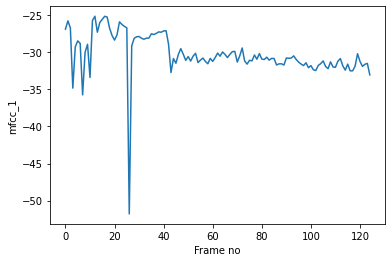

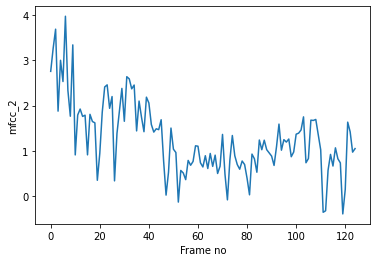

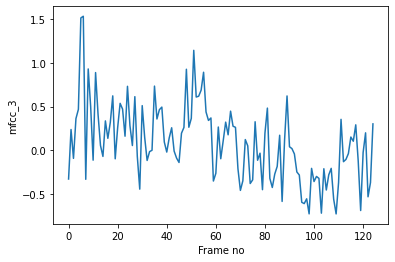

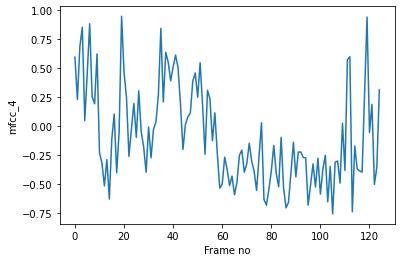

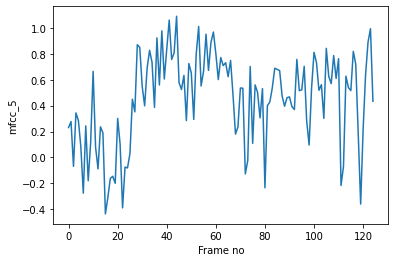

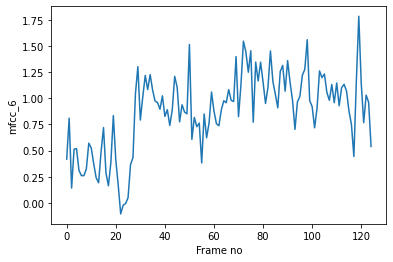

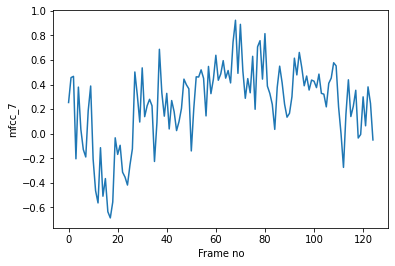

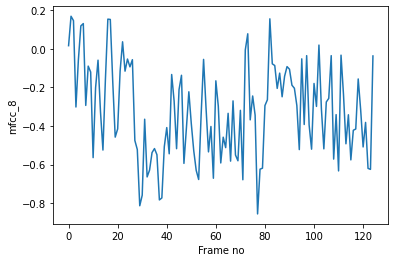

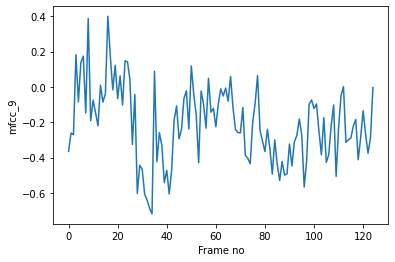

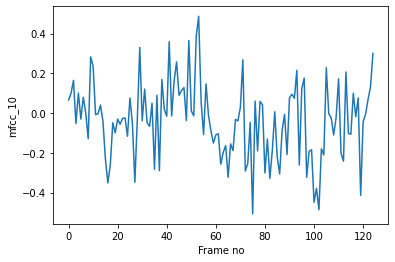

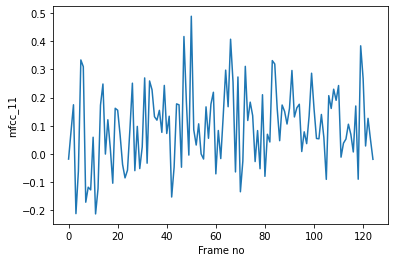

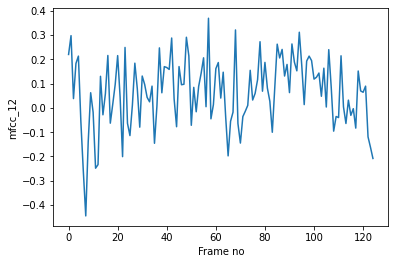

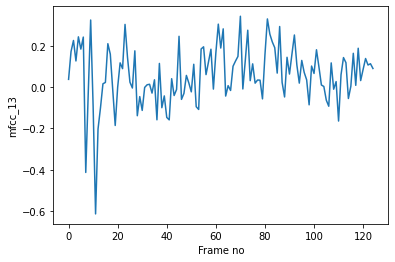

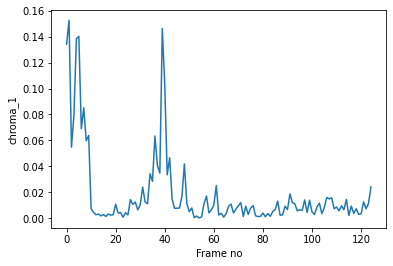

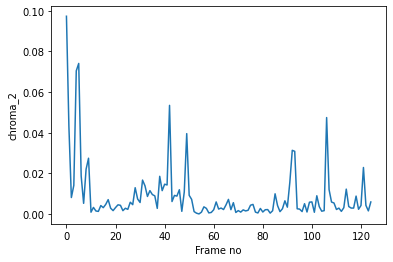

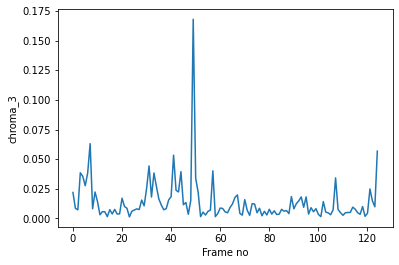

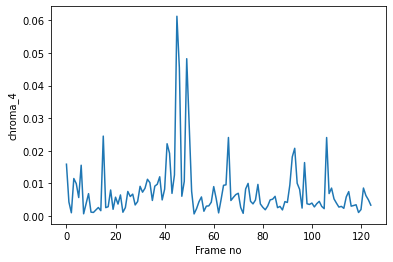

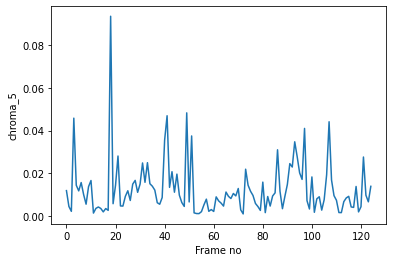

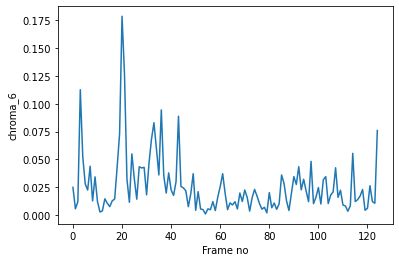

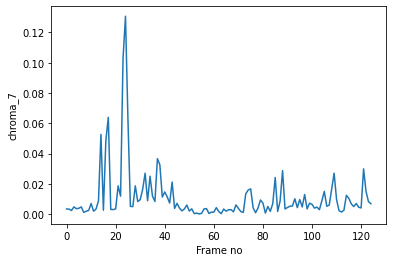

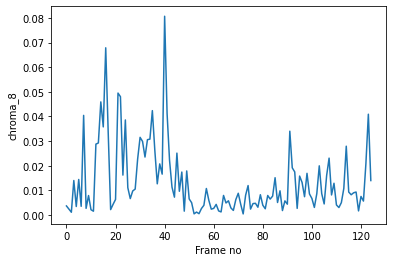

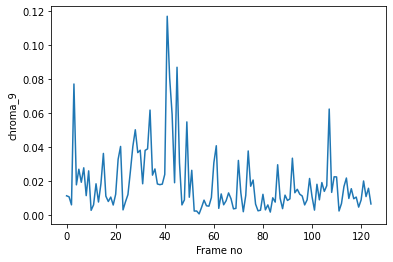

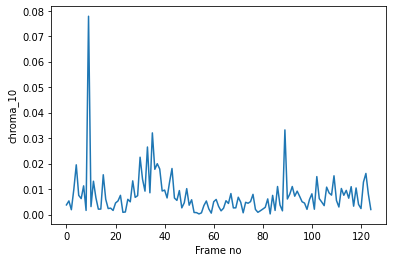

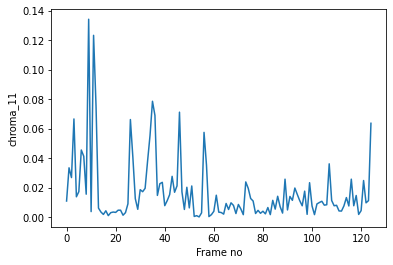

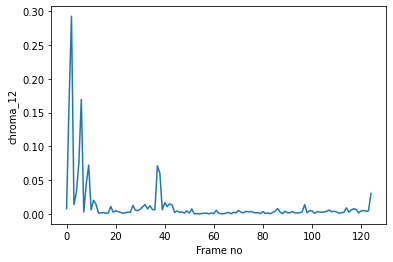

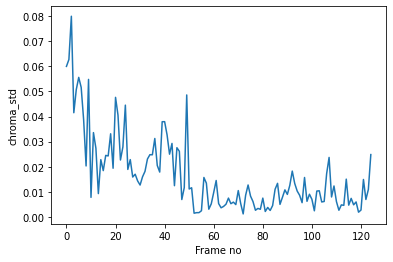

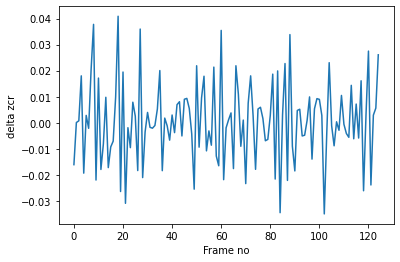

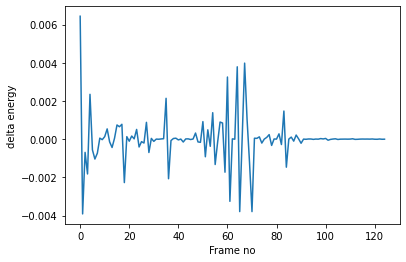

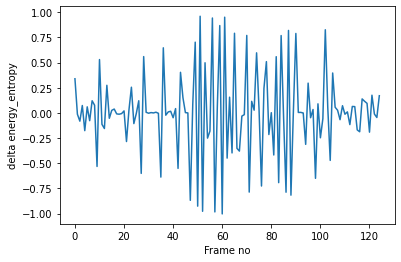

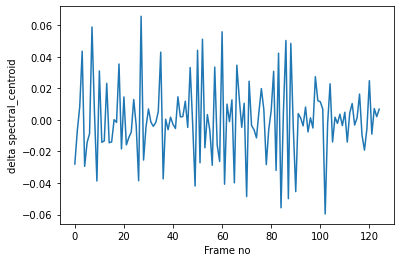

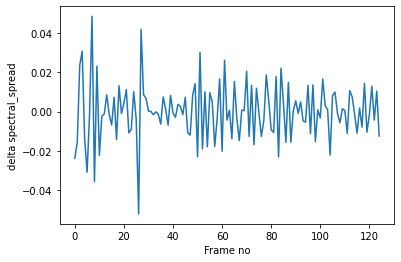

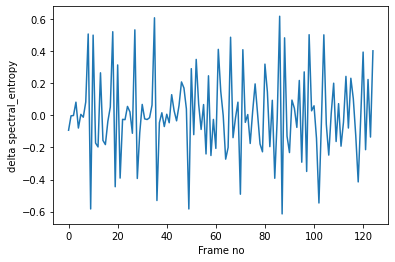

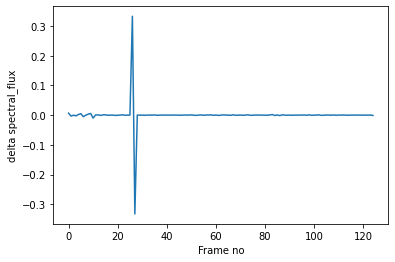

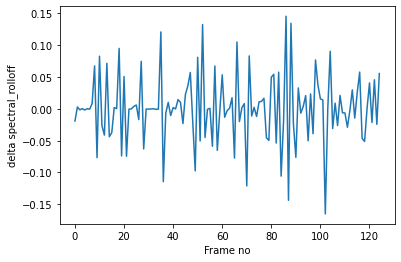

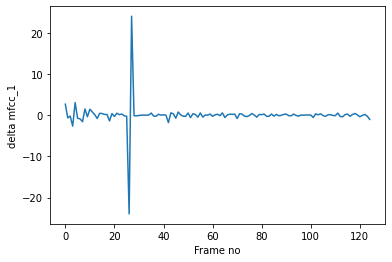

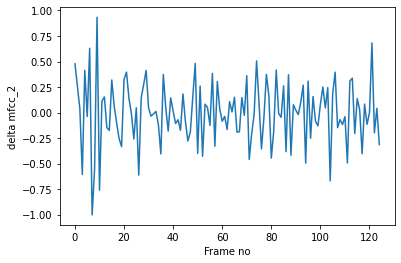

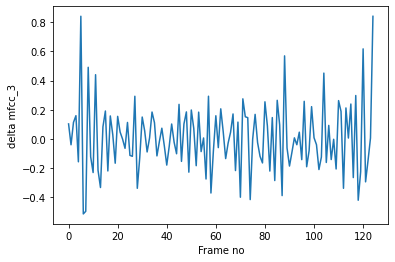

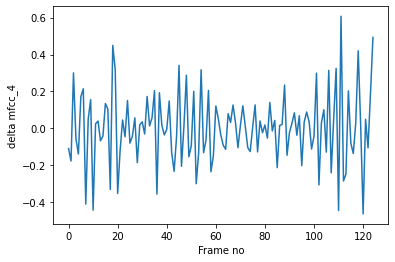

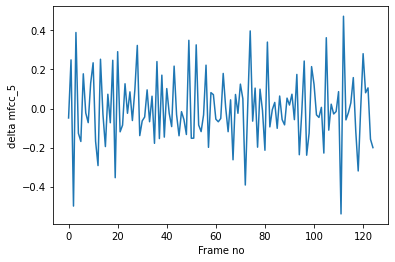

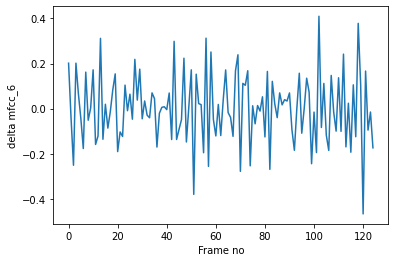

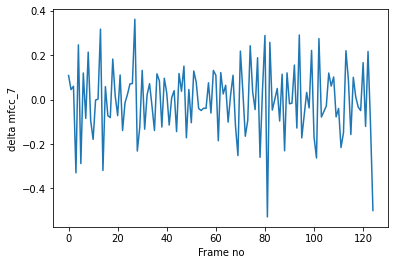

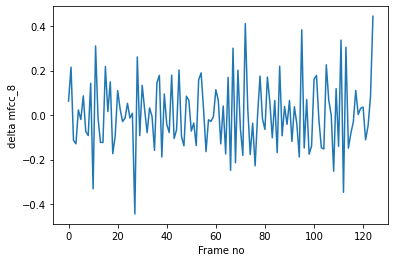

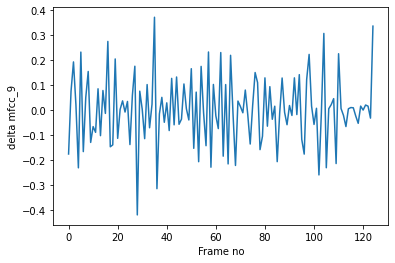

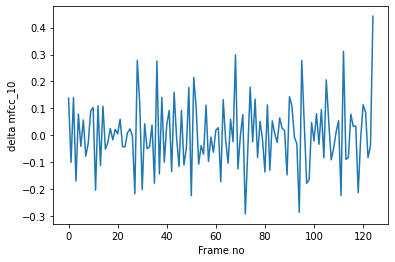

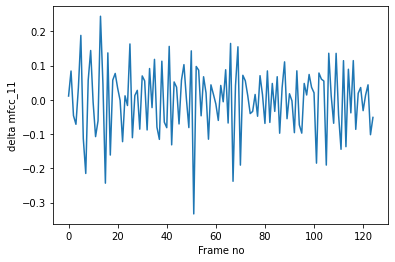

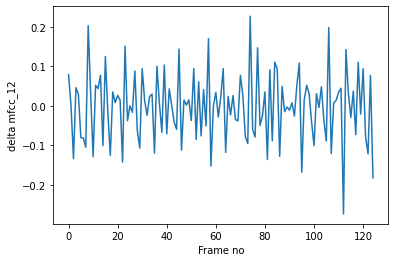

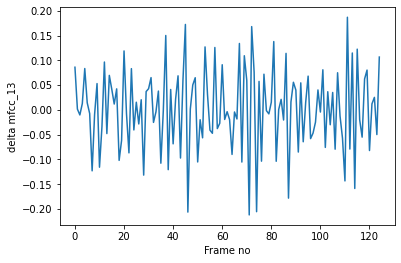

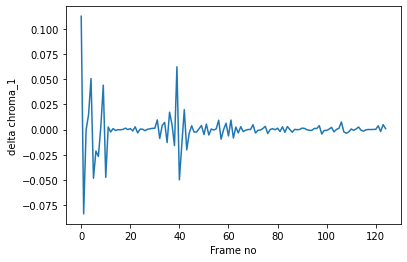

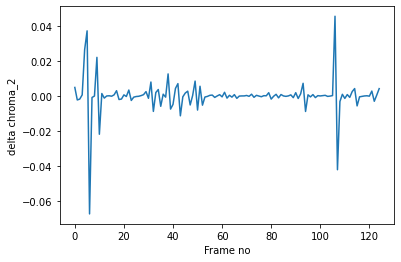

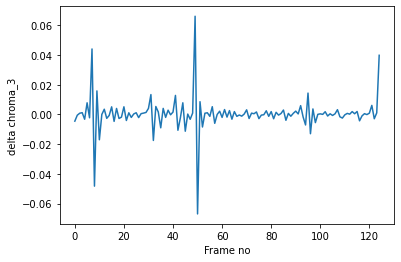

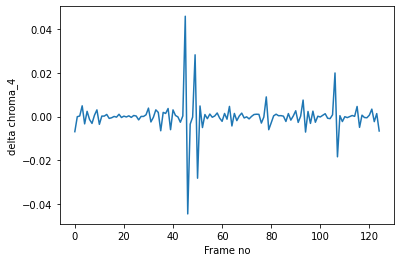

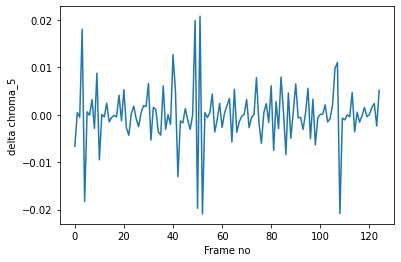

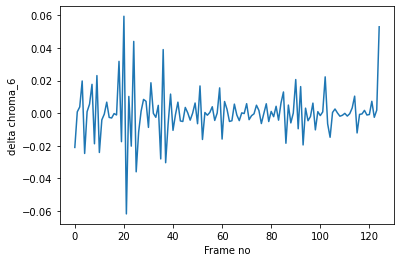

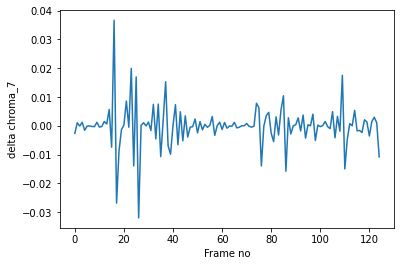

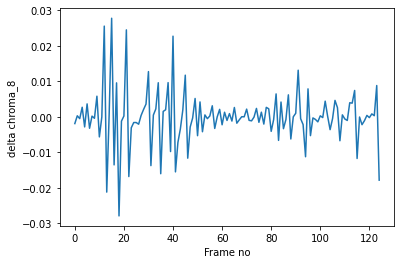

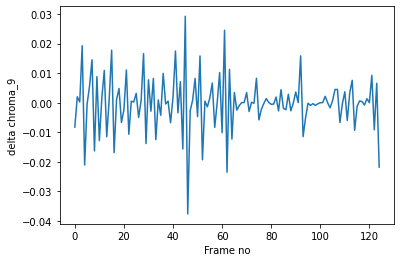

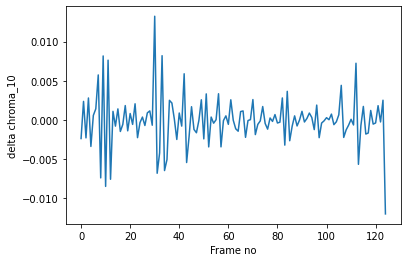

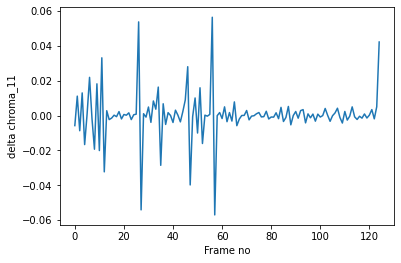

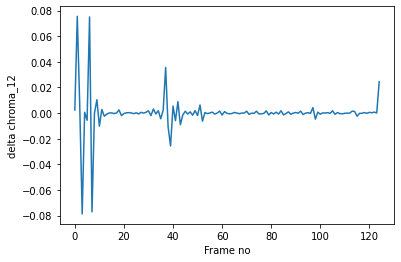

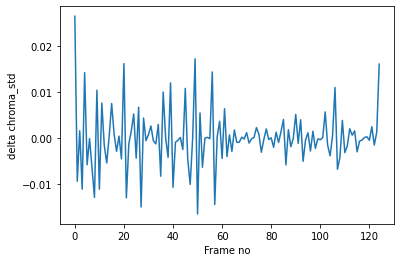

In [14]:
for i,name in enumerate(f_names):
    fig = plt.figure()
    plt.plot(F[i,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[i]) 
    plt.show()


In [15]:
df = pd.DataFrame([{ff_names:np.sum(ff) for ff, ff_names in zip(midFeat, midFeatLabels)}])
df=df.T
df

,0
zcr_mean,11.582849
energy_mean,0.164374
energy_entropy_mean,322.125000
spectral_centroid_mean,23.580147
spectral_spread_mean,20.853555
...,...
delta chroma_9_std,2.569660
delta chroma_10_std,1.161936
delta chroma_11_std,2.137421
delta chroma_12_std,1.652673
